In [1]:
!pip install tensorflow

In [2]:
!pip install tensorflow --no-cache-dir

In [3]:
!pip install setuptools

In [4]:
# Step 1: Import required libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

In [5]:
# Step 2: Define the path to your dataset
dataset_path = r"C:\Users\Vasundra\Downloads\deep\static\uploads"  # Local path to dataset

In [6]:
# Step 3: Set important parameters
img_size = (224, 224)  # DenseNet121 expects 224x224 images
batch_size = 32

In [7]:
# Step 4: Preprocessing using ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [8]:
# Step 5: Load train and test datasets
train_generator = train_datagen.flow_from_directory(
    r"C:\Users\Vasundra\Downloads\deep\static\uploads",
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    r"C:\Users\Vasundra\Downloads\deep\static\uploads" ,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 1600 images belonging to 8 classes.
Found 1600 images belonging to 8 classes.


In [9]:
# Step 6: Load the DenseNet121 model with pretrained weights
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [10]:
# Step 7: Build the model by adding layers on top of DenseNet121
model = Sequential([
    base_model,
    Flatten(),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dense(train_generator.num_classes, activation='softmax')  # Adjust according to the number of classes
])

In [11]:
# Freeze the base model layers to retain pre-trained features
base_model.trainable = False

# Step 8: Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Callbacks for better training
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-6)

# Train the model
epochs = 10  # Increase epochs
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=epochs,
    callbacks=[early_stop, reduce_lr]
)


Epoch 1/10


c:\Users\Vasundra\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


50/50 ━━━━━━━━━━━━━━━━━━━━ 143s 3s/step - accuracy: 0.4181 - loss: 2.3934 - val_accuracy: 0.8363 - val_loss: 0.4569 - learning_rate: 1.0000e-04
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 133s 3s/step - accuracy: 0.7896 - loss: 0.5509 - val_accuracy: 0.9244 - val_loss: 0.2392 - learning_rate: 1.0000e-04
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 142s 3s/step - accuracy: 0.8455 - loss: 0.3956 - val_accuracy: 0.8900 - val_loss: 0.3012 - learning_rate: 1.0000e-04
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 141s 3s/step - accuracy: 0.9006 - loss: 0.2882 - val_accuracy: 0.9494 - val_loss: 0.1694 - learning_rate: 1.0000e-04
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 206s 4s/step - accuracy: 0.9135 - loss: 0.2213 - val_accuracy: 0.9237 - val_loss: 0.1934 - learning_rate: 1.0000e-04
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 172s 3s/step - accuracy: 0.9030 - loss: 0.2602 - val_accuracy: 0.9825 - val_loss: 0.0728 - learning_rate: 1.0000e-04
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 134s 3s/step - accuracy: 0.9398 - loss: 0.1

In [13]:
# Step 10: Evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


50/50 ━━━━━━━━━━━━━━━━━━━━ 147s 3s/step - accuracy: 0.9989 - loss: 0.0248
Test Accuracy: 99.87%


In [14]:
# Step 11: Save the trained model locally
model.save('./fingerprint_bloodgroup_model_densenet.keras')

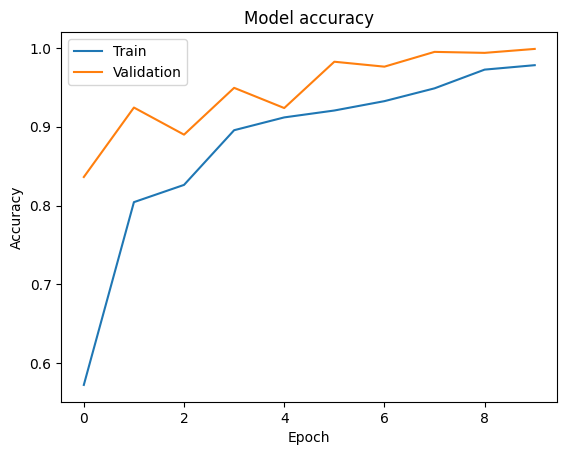

In [15]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

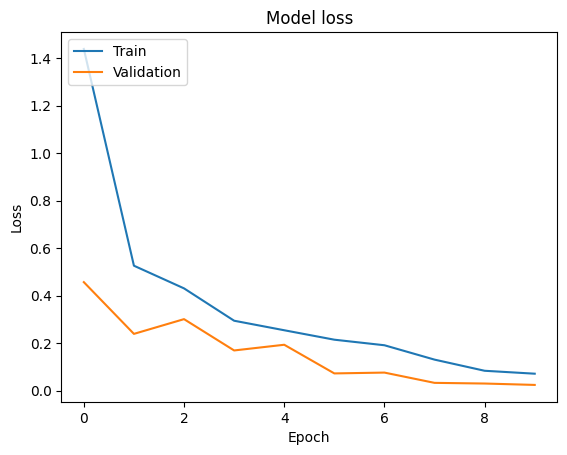

In [16]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [17]:
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, ConfusionMatrixDisplay

# Initialize lists for true labels and predictions
true_labels = []
predicted_labels = []

# Loop through the test generator to obtain predictions and true labels
for images, labels in test_generator:
    # Predict using the model
    preds = model.predict(images)
    preds = np.argmax(preds, axis=1)  # Convert probabilities to class indices
    true = np.argmax(labels, axis=1)  # Convert one-hot encoded labels to class indices

    # Extend lists with batch results
    predicted_labels.extend(preds)
    true_labels.extend(true)

    # Stop if we’ve processed the entire test set
    if len(true_labels) >= test_generator.samples:
        break


1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 

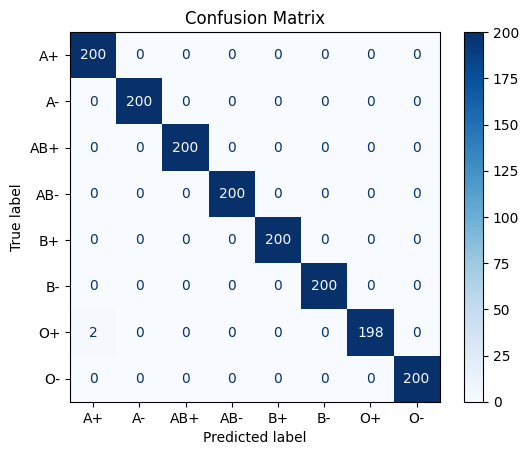

In [18]:
# Compute confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
class_labels = list(test_generator.class_indices.keys())  # Get class names from the generator
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix")
plt.show()

In [19]:
# Calculate precision, recall, and F1 score
precision = precision_score(true_labels, predicted_labels, average='weighted')
recall = recall_score(true_labels, predicted_labels, average='weighted')
f1 = f1_score(true_labels, predicted_labels, average='weighted')

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Precision: 1.00
Recall: 1.00
F1 Score: 1.00


In [20]:
def predict_blood_group(model, img_path, class_indices):
    # Load and preprocess the image
    img = load_img(img_path, target_size=(224, 224))  # Load image and resize to model input size
    img_array = img_to_array(img) / 255.0  # Convert to array and normalize
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Make prediction
    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    
    # Map the predicted index to the class label
    class_labels = {v: k for k, v in class_indices.items()}  # Reverse the dictionary to map indices to class names
    predicted_class = class_labels[predicted_class_index]

    # Display the image with prediction
    plt.imshow(img)
    plt.title(f"Predicted Blood Group: {predicted_class}")
    plt.axis('off')
    plt.show()

    return predicted_class


In [21]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

In [22]:
# Assuming train_generator is already created and the model is trained
class_indices = train_generator.class_indices  # Get the class indices from the training data generator

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


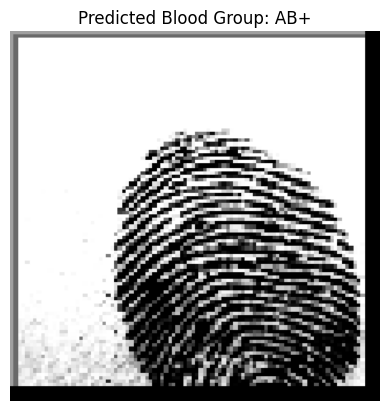

Predicted Blood Group: AB+


In [23]:
# Provide the path to the image you want to test
img_path = r"C:\Users\Vasundra\Downloads\deep\static\uploads\AB+\cluster_4_51.BMP" 

# Predict and display the blood group
predicted_blood_group = predict_blood_group(model, img_path, class_indices)
print("Predicted Blood Group:", predicted_blood_group)
